# PSyKE's demo for regression tasks

Some imports.

In [1]:
from psyke import Extractor
from psyke.regression import Grid, FeatureRanker
from psyke.regression.strategy import FixedStrategy, AdaptiveStrategy
from psyke.regression.optimizer import PEDRO
from sklearn.neighbors import KNeighborsRegressor
from psyke.utils.logic import pretty_theory
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd

Import an artificial dataset.

In [2]:
dataset = pd.read_csv("test/resources/datasets/df.csv")

Split between train and test set in a reproducible way.

In [3]:
dataset = dataset[["X", "Y", "Z7"]].dropna()
train, test = train_test_split(dataset, test_size=0.5, random_state=10)

We use as predictor a KNN and we train it.

In [4]:
predictor = KNeighborsRegressor(n_neighbors=1).fit(train.iloc[:, :-1], train.iloc[:, -1])

print((abs(predictor.predict(test.iloc[:, :-1]).flatten() - test.iloc[:, -1])).mean())

1.8959935518220539


We create several extractors that use ITER, GridEx and GridREx algorithms to extract prolog rules from the predictor.

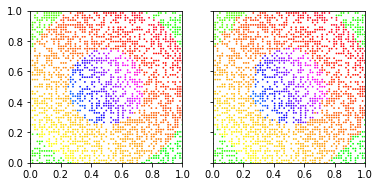

CReEPy performance (2 rules):
MAE = 11.08
MAE fidelity = 11.20



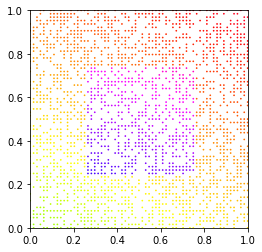

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.ylim((0, 1))
ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
ax1.set_xlim((0, 1))
ax1.set_aspect("equal")
ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
ax2.set_xlim((0, 1))
ax2.set_aspect("equal")
plt.show()

creepy = Extractor.creepy(predictor, depth=6, dbscan_threshold=0.3, error_threshold=2, constant=False)
theory_from_creepy = creepy.extract(train)
print('CReEPy performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(creepy.n_rules, creepy.mae(test), creepy.mae(test, predictor)))
#print('ITER extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c = creepy.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

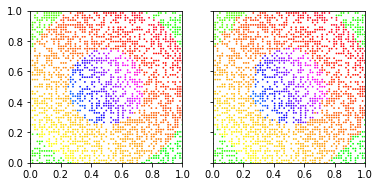

CREAM performance (16 rules):
MAE = 6.89
MAE fidelity = 7.16



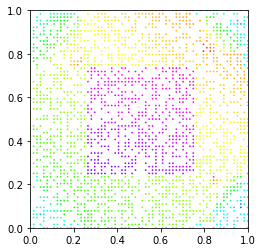

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.ylim((0, 1))
ax1.scatter(test.X, test.Y, c=test.iloc[:, -1], s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
ax1.set_xlim((0, 1))
ax1.set_aspect("equal")
ax2.scatter(test.X, test.Y, c=predictor.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
ax2.set_xlim((0, 1))
ax2.set_aspect("equal")
plt.show()

cream = Extractor.cream(predictor, depth=6, dbscan_threshold=0.3, error_threshold=2, constant=False)
theory_from_cream = cream.extract(train)
print('CREAM performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(cream.n_rules, cream.mae(test), cream.mae(test, predictor)))
#print('ITER extracted rules:\n\n' + pretty_theory(theory_from_cream))

plt.scatter(test.X, test.Y, c = cream.predict(test.iloc[:, :-1]), s = 0.5, cmap=plt.cm.get_cmap('gist_rainbow'))
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.gca().set_aspect("equal")
plt.show()

In [7]:
xxxxxxx

NameError: name 'xxxxxxx' is not defined

In [11]:
it = Extractor.iter(predictor, min_update=1.0 / 20, n_points=1, max_iterations=600,
                    min_examples=100, threshold=2)
theory_from_iter = it.extract(train)
print('ITER performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(it.n_rules, it.mae(test), it.mae(test, predictor)))
print('ITER extracted rules:\n\n' + pretty_theory(theory_from_iter))

ITER performance (131 rules):
MAE = 4.77
MAE fidelity = 5.06

ITER extracted rules:

'Z7'(X, Y, 41.7437) :-
    X in [0.3719, 0.4719], Y in [0.6375, 0.7375].
'Z7'(X, Y, 45.4289) :-
    X in [0.3719, 0.4719], Y in [0.5375, 0.6375].
'Z7'(X, Y, 43.0805) :-
    X in [0.3719, 0.4719], Y in [0.4375, 0.5375].
'Z7'(X, Y, 40.582) :-
    X in [0.3719, 0.4719], Y in [0.3375, 0.4375].
'Z7'(X, Y, 37.7875) :-
    X in [0.3719, 0.4719], Y in [0.2875, 0.3375].
'Z7'(X, Y, 43.9102) :-
    X in [0.4719, 0.5219], Y in [0.2875, 0.4375].
'Z7'(X, Y, 46.0758) :-
    X in [0.5219, 0.5719], Y in [0.2875, 0.4375].
'Z7'(X, Y, 48.7727) :-
    X in [0.5719, 0.6719], Y in [0.2875, 0.4375].
'Z7'(X, Y, 46.5711) :-
    X in [0.4719, 0.5219], Y in [0.4375, 0.5375].
'Z7'(X, Y, 49.5133) :-
    X in [0.5219, 0.5719], Y in [0.4375, 0.5375].
'Z7'(X, Y, 52.0141) :-
    X in [0.5719, 0.6219], Y in [0.4375, 0.5375].
'Z7'(X, Y, 54.7695) :-
    X in [0.6219, 0.6719], Y in [0.4375, 0.5375].
'Z7'(X, Y, 57.5844) :-
    X in [0.6719,

In [12]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=5, algorithm=PEDRO.Algorithm.GRIDEX, objective=PEDRO.Objective.MODEL)
pedro.search()
_ = pedro.get_best()

Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 0.00. MAE = 23.08, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 0.00. MAE = 23.08, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 5.77. MAE = 23.08, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 11.54. MAE = 23.08, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 17.31. MAE = 23.08, 4 rules
Algorithm.GRIDEX. Grid (1). Fixed (2). Threshold = 23.08. MAE = 23.08, 4 rules

Algorithm.GRIDEX. Grid (2). Fixed (2). Threshold = 0.00. MAE = 23.08, 20 rules
Algorithm.GRIDEX. Grid (2). Fixed (2). Threshold = 0.00. MAE = 23.08, 20 rules

Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.00. MAE = 14.55, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 0.00. MAE = 14.55, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 3.64. MAE = 14.55, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 7.27. MAE = 14.55, 9 rules
Algorithm.GRIDEX. Grid (1). Fixed (3). Threshold = 10.91.

In [13]:
ranked = FeatureRanker(dataset.columns[:-1]).fit(predictor, dataset.iloc[:, :-1]).rankings()
gridEx = Extractor.gridex(predictor, Grid(1, AdaptiveStrategy(ranked, [(0.99, 5)])), threshold=0.01)
theory_from_gridEx = gridEx.extract(train)
print('GridEx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridEx.n_rules, gridEx.mae(test), gridEx.mae(test, predictor)))
print('GridEx extracted rules:\n\n' + pretty_theory(theory_from_gridEx))

GridEx performance (5 rules):
MAE = 20.89
MAE fidelity = 20.79

GridEx extracted rules:

'Z7'(X, Y, -10.0044) :-
    X in [0.0, 1.0], Y in [0.0, 0.2].
'Z7'(X, Y, -2.5647) :-
    X in [0.0, 1.0], Y in [0.2, 0.4].
'Z7'(X, Y, 11.0132) :-
    X in [0.0, 1.0], Y in [0.4, 0.6].
'Z7'(X, Y, -6.5909) :-
    X in [0.0, 1.0], Y in [0.6, 0.8].
'Z7'(X, Y, -20.1894) :-
    X in [0.0, 1.0], Y in [0.8, 1.0].


In [14]:
pedro = PEDRO(predictor, train, max_mae_increase=1.2, min_rule_decrease=0.9, readability_tradeoff=0.1,
              max_depth=5, patience=5, algorithm=PEDRO.Algorithm.GRIDREX, objective=PEDRO.Objective.MODEL)
pedro.search()
_ = pedro.get_best()

Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.00. MAE = 23.08, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 0.00. MAE = 23.08, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 5.77. MAE = 23.08, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 11.54. MAE = 23.08, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 17.31. MAE = 23.08, 4 rules
Algorithm.GRIDREX. Grid (1). Fixed (2). Threshold = 23.08. MAE = 23.08, 4 rules

Algorithm.GRIDREX. Grid (2). Fixed (2). Threshold = 0.00. MAE = 23.08, 20 rules
Algorithm.GRIDREX. Grid (2). Fixed (2). Threshold = 0.00. MAE = 23.08, 20 rules

Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.00. MAE = 14.55, 9 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 0.00. MAE = 14.55, 9 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 3.64. MAE = 14.55, 9 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Threshold = 7.27. MAE = 14.55, 9 rules
Algorithm.GRIDREX. Grid (1). Fixed (3). Thres

In [16]:
ranked = FeatureRanker(dataset.columns[:-1]).fit(predictor, dataset.iloc[:, :-1]).rankings()
gridREx = Extractor.gridrex(predictor, Grid(1, AdaptiveStrategy(ranked, [(0.99, 5)])), threshold=0.01)
theory_from_gridREx = gridREx.extract(train)
print('GridREx performance ({} rules):\nMAE = {:.2f}\nMAE fidelity = {:.2f}\n'
      .format(gridREx.n_rules, gridREx.mae(test), gridREx.mae(test, predictor)))
print('GridREx extracted rules:\n\n' + pretty_theory(theory_from_gridREx))

GridREx performance (5 rules):
MAE = 19.10
MAE fidelity = 19.15

GridREx extracted rules:

'Z7'(X, Y, Z7) :-
    X in [0.0, 1.0], Y in [0.0, 0.2], Z7 is -3.8608 + -2.537 * X + -52.0576 * Y.
'Z7'(X, Y, Z7) :-
    X in [0.0, 1.0], Y in [0.2, 0.4], Z7 is -41.7307 + -9.8781 * X + 147.0318 * Y.
'Z7'(X, Y, Z7) :-
    X in [0.0, 1.0], Y in [0.4, 0.6], Z7 is 14.5877 + -5.5897 * X + -1.5672 * Y.
'Z7'(X, Y, Z7) :-
    X in [0.0, 1.0], Y in [0.6, 0.8], Z7 is 134.289 + -8.9793 * X + -195.0855 * Y.
'Z7'(X, Y, Z7) :-
    X in [0.0, 1.0], Y in [0.8, 1.0], Z7 is -73.6233 + -0.9014 * X + 59.4614 * Y.
